In [1]:
## import python data analysis library 
import pandas as pd

## import data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.spines import Spine

## import module to read files
import mimetypes
import urllib
import os

# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive	
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:

## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/Visualization/Data/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Visualization/Images/'

In [3]:
class Radar:
    # read data
    def read_file(self, file):
        """Read different types of files and return pandas dataframe.

        This function can transform multiple file type such as csv/excel/text into
        a pandas dataframe. User need to input the filename such as: 'file.csv'.
        If the file type cannot be find or not support it, it will return the message.

        Args:
            file: filename of user data source

        Returns:
            data : A pandas dataframe

        """
        # Get the file URL
        file_url = urllib.request.pathname2url(file)  # try catch
        # use mimetypes package to guess the file type
        # For example: 'file.csv' will return 'csv'
        ftype = mimetypes.guess_type(file_url, strict=True)[0]
        ## read data file according to its formate, default includes three types of files: csv/excel/text
        # read csv format data
        if 'csv' in ftype:
            # usecols: return a subset of the columns, here choose one column to use in the line chart
            data = pd.read_csv(path + file)
        # read excel format data
        elif 'sheet' in ftype:
            data = pd.read_excel(path + file)
        # read text format data
        elif ftype == 'text/plain':
            data = pd.read_csv(path + file, sep="\t")
        else:
            print("File type cannot find!")
        return data

    def radar_plot(self, file, index_col, category_col, y_col_list, y_lim,output_name,
                   **kwargs):
        """Radar chart with selected overlay

        This function will convert the user's incoming data set into DataFrame and then draw
        the radar Chart using Matplotlib. The radar chart can show category, y, overlay.

        To use this function, User need a dataset with three variable columns. The three variables are
        index_col, category_col and y_col_list. The index column usually the name of that row such as 'player,
        The category_col is list of category and the y_col_list is the list of y value need to present.

        In our example, The index_col is player, The category_col is 
        ['Pace','Shooting','Passing','Dribbling','Defending','Physical'],
        and the y_col_list is ['Cristiano Ronaldo'].

        Args:
            file: file name of your data source, it support csv/excel,text.for example:'new_file.csv'
            index_col: The index column. Normally it should be the name of the content
            category_col: input list of attributes for the radar plot
            y_col_name: input list of items
            y_lim: The Y lim value

        """

        conf = {
            'figsize': 
            (6, 4),
            'overlay':
            False,
            'linewidth':
            2,
            'gridlinewidth':
            0.8,
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'legend_loc':
            'upper right',
            'title':
            False,
            'title_pad':
            10,
            'title_size':
            15,
            'title_loc':
            'center',
            'title_height':
            1.1,
            'xtick_fontsize':
            15,
            'ytick_fontsize':
            15,
            'ytick_color':
            'blue',
            'xtick_color':
            'black',
            'alpha':
            0.3,
            'legendbox_loc': (1.1, 1.0),
            'plot_title':
            ''
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)

        # Input the valid filename and return the pandas dataframe for drawing
        data = self.read_file(file)

        # set the index column
        data = data.set_index(index_col)
        # set the selected category from user input
        data = data[category_col]
        # set the y column
        data = data.loc[y_col_list]

        # create the close shape list
        close_shape = []

        # plot height and width
        fig = plt.figure(figsize=conf['figsize'])
        # polar plot
        ax = fig.add_subplot(111, polar=True)

        # radar plot
        for i in data.values:
            # link the line become a close shape radar plot
            close_shape = np.concatenate((i, [i[0]]))
            # calculate the angel of label placement
            label_placement = np.linspace(start=0,
                                          stop=2 * np.pi,
                                          num=len(close_shape))
            ax.plot(label_placement, close_shape)

            # The overlay background
            if conf['overlay'] == True:
                ax.fill(label_placement, close_shape, alpha=conf['alpha'])

        # apply the labels and line into the right place
        lines, labels = plt.thetagrids(np.degrees(label_placement),
                                       labels=category_col)

        # add the legend, legend will show the y values
        ax.legend(labels=y_col_list,
                  bbox_to_anchor=conf['legendbox_loc'],
                  fontsize=conf['legend_size'])

        # x tricks and y ticks color and fontsize
        plt.yticks(color=conf['ytick_color'], fontsize=conf['ytick_fontsize'])
        plt.xticks(color=conf['xtick_color'], fontsize=conf['xtick_fontsize'])

        # Y lim value from user input for accurcy
        plt.ylim(y_lim)

        # plot title
        plt.title(conf['plot_title'],
                  fontsize=conf['title_size'],
                  y=conf['title_height'])
        
        

        # xtrick alignment, It can automatict adjust x tricks location, let the x tricks lables outside of the plot
        for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
            theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
            theta = np.pi / 2 - theta
            y, x = np.cos(theta), np.sin(theta)
            if x >= 0.1:
                label.set_horizontalalignment('left')
            if x <= -0.1:
                label.set_horizontalalignment('right')
            if y >= 0.5:
                label.set_verticalalignment('bottom')
            if y <= -0.5:
                label.set_verticalalignment('top')
        # save the plot
        plt.tight_layout()
        plt.savefig(path_img + output_name)

    def spider_plot(self, file, index_col, category_col, y_col_list, y_lim,output_name,
                    **kwargs):
        """Spider chart with selected overlay

        This function will convert the user's incoming data set into DataFrame and then draw
        the spider Chart using Matplotlib. The radar chart can show category, y, overlay.

        To use this function, User need a dataset with three variable columns. The three variables are
        index_col, category_col and y_col_list. The index column usually the name of that row such as 'player,
        The category_col is list of category and the y_col_list is the list of y value need to present.

        In our example, The index_col is status, The category_col is 
        ['blood sugar','blood pressure','blood oxygen','blood fat',' heart rate'],
        and the y_col_list is ['Before','After'].

        Args:
            file: file name of your data source, it support csv/excel,text.for example:'new_file.csv'
            index_col: The index column. Normally it should be the name of the content
            category_col: input list of attributes for the radar plot
            y_col_name: input list of items
            y_lim: The Y lim value

        """

        conf = {
            'figsize':
            (6, 4),
            'overlay':
            False,
            'linewidth':
            2,
            'gridline_width':
            0.8,
            'gridline_color':
            'grey',
            'gridline_style':
            '-',
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'legend_loc':
            'upper right',
            'title':
            False,
            'title_pad':
            10,
            'title_size':
            15,
            'title_loc':
            'center',
            'title_height':
            1.1,
            'xtick_fontsize':
            15,
            'ytick_fontsize':
            15,
            'ytick_color':
            'blue',
            'xtick_color':
            'black',
            'alpha':
            0.3,
            'legendbox_loc': (1.3, 1.0),
            'plot_title':
            ''
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)

        # read file
        data = self.read_file(file)

        # set the index column
        data = data.set_index(index_col)
        # set the selected category from user input
        data = data[category_col]
        # set the y column
        data = data.loc[y_col_list]
        # create the close shape list
        close_shape = []
        # plot height and width
        fig = plt.figure(figsize=conf['figsize'])
        # polar plot
        ax = fig.add_subplot(111, polar=True)

        # spider plot
        for i in data.values:
            # link the line become a close shape radar plot
            close_shape = np.concatenate((i, [i[0]]))
            # calculate the angel of label placement
            label_placement = np.linspace(start=0,
                                          stop=2 * np.pi,
                                          num=len(close_shape))
            ax.plot(label_placement, close_shape)

            # The overlay background
            if conf['overlay'] == True:
                ax.fill(label_placement, close_shape, alpha=conf['alpha'])

            # change the gridline become spider plot
            pl = ax.yaxis.get_gridlines()
            for line in pl:
                line.get_path()._interpolation_steps = len(close_shape)

        # adjust the gridline color,linewidth and linestyle
        ax.grid(color=conf['gridline_color'],
                linestyle=conf['gridline_style'],
                linewidth=conf['gridline_width'])

        # apply the labels and line into the right place
        lines, labels = plt.thetagrids(np.degrees(label_placement),
                                       labels=category_col)

        # add the legend, legend will show the y values
        ax.legend(labels=y_col_list,
                  bbox_to_anchor=conf['legendbox_loc'],
                  fontsize=conf['legend_size'])

        # x tricks and y ticks color and fontsize
        plt.yticks(color=conf['ytick_color'], fontsize=conf['ytick_fontsize'])
        plt.xticks(color=conf['xtick_color'], fontsize=conf['xtick_fontsize'])

        # Y lim value from user input for accurcy
        plt.ylim(y_lim)

        # save the plot
        plt.savefig(path_img + output_name)

        # plot title
        plt.title(conf['plot_title'],
                  fontsize=conf['title_size'],
                  y=conf['title_height'])

        # xtrick alignment, It can automatict adjust x tricks location, let the x tricks lables outside of the plot
        for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
            theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
            theta = np.pi / 2 - theta
            y, x = np.cos(theta), np.sin(theta)
            if x >= 0.1:
                label.set_horizontalalignment('left')
            if x <= -0.1:
                label.set_horizontalalignment('right')
            if y >= 0.5:
                label.set_verticalalignment('bottom')
            if y <= -0.5:
                label.set_verticalalignment('top')

        # save the plot
        plt.tight_layout()
        plt.savefig(path_img + output_name)


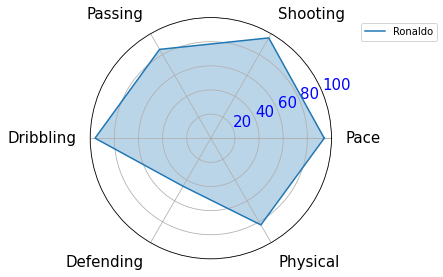

In [4]:
r1 = Radar()
"""Radar chart with selected overlay

This function will convert the user's incoming data set into DataFrame and then draw
the radar Chart using Matplotlib. The radar chart can show category, y, overlay.

To use this function, User need a dataset with three variable columns. The three variables are
index_col, category_col and y_col_list. The index column usually the name of that row such as 'player,
The category_col is list of category and the y_col_list is the list of y value need to present.

In our example, The index_col is player, The category_col is 
['Pace','Shooting','Passing','Dribbling','Defending','Physical'],
and the y_col_list is ['Cristiano Ronaldo'].

Args:
    file: file name of your data source, it support csv/excel,text.for example:'new_file.csv'
    index_col: The index column. Normally it should be the name of the content
    category_col: input list of attributes for the radar plot
    y_col_name: input list of items
    y_lim: The Y lim value

"""
r1.radar_plot(file='ronaldo.xlsx',
              index_col='player',
              category_col=[
                  'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending',
                  'Physical'
              ],
              y_col_list=['Ronaldo'],
              overlay=True,
              y_lim=(0, 100),
              output_name='football.jpg')


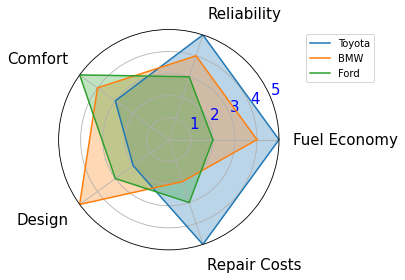

In [5]:
r2 = Radar()
"""Radar chart with selected overlay

This function will convert the user's incoming data set into DataFrame and then draw
the radar Chart using Matplotlib. The radar chart can show category, y, overlay.

To use this function, User need a dataset with three variable columns. The three variables are
index_col, category_col and y_col_list. The index column usually the name of that row such as 'player,
The category_col is list of category and the y_col_list is the list of y value need to present.

In our example, The index_col is player, The category_col is 
['Pace','Shooting','Passing','Dribbling','Defending','Physical'],
and the y_col_list is ['Cristiano Ronaldo'].

Args:
    file: file name of your data source, it support csv/excel,text.for example:'new_file.csv'
    index_col: The index column. Normally it should be the name of the content
    category_col: input list of attributes for the radar plot
    y_col_name: input list of items
    y_lim: The Y lim value

"""
r2.radar_plot(file='vehicle.xlsx',
              index_col='Car',
              category_col=[
                  'Fuel Economy', 'Reliability', 'Comfort', 'Design',
                  'Repair Costs'
              ],
              y_col_list=['Toyota', 'BMW', 'Ford'],
              overlay=True,
              y_lim=(0, 5),
              output_name='car.jpg')


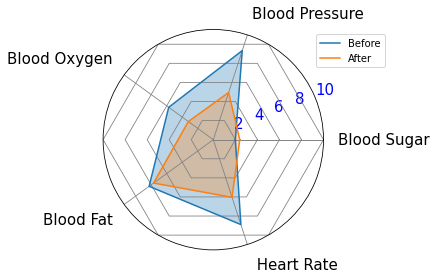

In [6]:
r3 = Radar()
"""Spider chart with selected overlay

This function will convert the user's incoming data set into DataFrame and then draw
the spider Chart using Matplotlib. The radar chart can show category, y, overlay.

To use this function, User need a dataset with three variable columns. The three variables are
index_col, category_col and y_col_list. The index column usually the name of that row such as 'player,
The category_col is list of category and the y_col_list is the list of y value need to present.

In our example, The index_col is status, The category_col is 
['blood sugar','blood pressure','blood oxygen','blood fat',' heart rate'],
and the y_col_list is ['Before','After'].

Args:
    file: file name of your data source, it support csv/excel,text.for example:'new_file.csv'
    index_col: The index column. Normally it should be the name of the content
    category_col: input list of attributes for the radar plot
    y_col_name: input list of items
    y_lim: The Y lim value

"""
r3.spider_plot(file='sick.xlsx',
               index_col='status',
               category_col=[
                   'Blood Sugar', 'Blood Pressure', 'Blood Oxygen',
                   'Blood Fat', ' Heart Rate'
               ],
               y_col_list=['Before', 'After'],
               overlay=True,
               y_lim=(0, 10),
               output_name='sick.jpg')
